[lib](https://drive.google.com/drive/folders/1ZmaZX95yce4uf9xoULUwa6tCom9_JPqt)

# 머신러닝 > 지도학습 > 분류 > 성능평가 지표
---

- 통계학의 혼동행렬이라는 항목을 이용하여 평가
- 예측값이 실제 관측값을 얼마나 정확하게 예측하였는지, 이것을 보여주는 행렬
  - 암을 예측하였는데, 실제로 양성이였는가? 음성이였는가?

## 혼동행렬(오차행렬)
---
- 실제로 병이 있다면 
    - Positive (P)
- 실제로 병이 없다면
    - Nagative (N)
    
- 실제로 병이 있다고 예측했다 : True  ->  T
- 실제로 병이 없다고 예측했다 : False ->  F

--- 
- TP 상황 (True, Positive)
    - 병이 있다고 예측하였는데, 실제로 병이 있었다 
    -  TP(긍정한것이 참이되었다.)
- TN 상황 (True, Nagative)
    - 병이 없을거라고 예측하였는데, 실제로 병이 없었다.
    - TN(부정한것이 참이되었다.)
    
- FP 상황 (False,Positive)
    - 실제로 병이 있을거라 생각했는데, 실제로 병이 없었다. 
    - FP( 긍정한 것이 부정되었다)
    - 1형 오류
- FN 상황 (False, Nagative)
    - 실제로 병이 없다고 예측했는데, 실제로 병이 있었다.
    - FN(부정한 것이 부정 되었다.)
    - 2형 오류 

---

- 정확도( accuracy )
    - ??
    
- 정밀도( P:Precision )
    - 병이 있다고 예측을 하였는데, 실제 병이 있는 비율, 정답율 
    - TP / (TP + FP)
    
- 재현율( R:ReCall, 민감도, 참긍정률 )
    - 실제 병이 있는 전체 데이터중, 참 긍정 비율
    - TP / ( TP + FN ) 
    
- F1 점수, f1-score
    - 정밀도와 재현율의 조화 평균 
    - F1 = 2/(1/P + 1/R)
    
- 특이성 
    - 실제 병이 없는 전체 데이터 중에 예측이 참 부정의 비율 
    - TN / (TN + FP)
    
- 곡선하 면적(ROC; Area under curve), AUC
    - 참 긍정비율과 거짓 긍정비율 사이를 기술/표현한다. 
    - 1 - 특이성 
    
---
    
```py
# 이쁘게 출력하기위해 프린트 사용 
print( metrics.classification_report(freq[1]['labels'], predict ))
출력물 >>>


              precision    recall  f1-score   support

          en       0.67      1.00      0.80         2
          fr       1.00      1.00      1.00         2
          id       1.00      0.50      0.67         2
          tl       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.92      0.88      0.87         8
weighted avg       0.92      0.88      0.87         8

```
---

## 다중클래스에서 클래스 전체 평균 산출물 
---

- 클래스 = 레이블 = 종속변수 
- 속성 = 피처 = 독립변수 
---

- 마이크로 평균 

    - 모든 클레스의 결과를 합쳐서 전체를 평가
    - 3개 클레스의 결과 => TP1, FP1, TP2, FP2, TP3, FP3 이렇게 존재한다면
    - 정밀도(마이크로평균) = (TP1 + TP2 + TP3)/(TP1 + FP1 + TP2 + FP2 + TP3 + FP3)
   
   
- 매크로 평균

    - 전체 성능의 양상을 알기 위해서 사용
    - 정밀도 = (개별 정밀도1 + 개별정밀도2 + ...)/3(클레스의 수) 
    
---

## AUC, ROC커브
---

- 1. 연구목표 : ROC, AUC 표현
- 2. 데이터획득 : sklearn의 load계열 함수를 이용하여 iris 데이터획득
- 3. 데이터준비 : iris 데이터를 dataFrame으로 획득하라
- 4. 데이터분석 : 생략 
- 5. 모델링구축 : 여러개의 알고리즘을 이용하여 구성할것

---

In [2]:
# sklearn에 데이터 셋
import sklearn.datasets

In [1]:
from matplotlib import pyplot as plt 
import pandas as pd 

---

- 1. 연구목표 : ROC, AUC 표현
- 2. 데이터획득 : sklearn의 load계열 함수를 이용하여 iris 데이터획득
- 3. 데이터준비 : iris 데이터를 dataFrame으로 획득하라
- 4. 데이터분석 : 생략 
- 5. 모델링구축 : 여러개의 알고리즘을 이용하여 구성할것

---

In [3]:
# 실습 
# 아이리스 데이터 로드하여 df로 구성하시오
# 독립변수와 종송변수 모두 추가 => 순화 필요 

In [4]:
# 데이터 로드하기 
tmp = sklearn.datasets.load_iris()
tmp

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# json 형태의 데이터 셋안에 정보를 확인한다. 
dir(tmp)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
# 기본데이터 
tmp['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# 특징
tmp['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# 수치화된 정답 레이블
tmp['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# 정답 
# tmp.target_names
tmp['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df = pd.DataFrame(data=tmp['data'], columns=tmp['feature_names'])
df
# 타겟을 추가 해야하는데 .... 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
tmp['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
# 뭘 추가 해야하나 -> 길이가 안맞데 ... ㅇ.ㅇ;;
# df['names'] = tmp.target_names

ValueError: Length of values does not match length of index

---
### 정답
---

In [14]:
# 데이터 로드하기 
tmp = sklearn.datasets.load_iris()
tmp

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
# 데이터와 컬럼명을 부여하여 생성 
df = pd.DataFrame(data=tmp['data'], columns=tmp['feature_names'])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
# 현재 데이터 프레임은 (150,4)이므로 컬럼을 추가
df.shape

(150, 4)

In [18]:
# 컬럼 추가 -> 계산 할때 수치화 하기 수월하다
# 그래서 target_names가 아닌 target을 사용 
# df['species'] = tmp.target
df['species'] = tmp['target']
df.shape

(150, 5)

In [19]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


In [20]:
# 수치화 데이터가 계산하기 수월하다
tmp.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

---

##  Roc, Auc를 이용한 성능평가를 수행하기 위해 모듈 가져오기 

In [21]:
import sklearn
# 측정 패키지
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split # 훈련용, 테스트용 분류

In [22]:
# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
df.columns

In [23]:
# # 분류 알고리즘 별로 손쉽게 시각화를 하기 위해 값 세팅
# class_map = {
#     '로지스틱 회귀':('-' , LogisticRegression()),    
#     '결정 트리':    ('--', DecisionTreeClassifier(max_depth=5)),
#     '랜덤 포레스트':('.-', RandomForestClassifier(max_depth=5, n_estimators=10, 
#                            max_features=1)),
#     '나이브 베이즈':(':' , GaussianNB())
# }

In [24]:
# 1. 시각화를 위해서 준비, 알고리즘 생성 
class_map = {
    'LogisticRegression'     :('-' , LogisticRegression()),
    'DecisionTreeClassifier' :('--', DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier' :('.-', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    'GaussianNB'             :(':' , GaussianNB())
}

In [25]:
df.iloc[:,:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [26]:
test = df[df.columns[:-1]]
test.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [27]:
# 2. 데이터 준비(df) => 훈련용, 테스트용 데이터 준비 
# 독립 변수 데이터만 구하시오 => (150, 4) 
# X = df[df.columns[:-1]]
# X = df[ ['sepal length (cm)'] ]
# 데이터 프레임 
# X = df.iloc[:,:-1]
# X

X = df[ df.columns[:-1] ]
X.shape

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [28]:
# 데이터의 결과가 'versicolor' 이냐 아니냐  => 참 , 거짓(이진 데이터 )

In [ ]:
df.columns[-1]

In [ ]:
tmp.target_names

In [29]:
# 3. 학습 
# 근거는 차원 때문에 
# 1차원이어야한다 -> 시리즈로 나와야한다 
# 차원 축소 => 인덱싱 

# Y는 종속 변수 데이터만 
Y = df[df.columns[-1]] == 1
# type(Y), Y.shape
Y

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [30]:
# 훈련용 , 테스트용 
# 0.8은 실험적인 극단적인 상황(테스트가 더많다)
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.8)

In [31]:
X_train.shape,X_test.shape,X_train.shape[0]*4

((30, 4), (120, 4), 120)

## 훈련(학습) => 평가(비교할수 있게 시각화)
---

-ROC 커브로 드로잉(선형차트)


In [32]:
# items()
class_map.items()

dict_items([('LogisticRegression', ('-', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False))), ('DecisionTreeClassifier', ('--', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'))), ('RandomForestClassifier', ('.-', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_feat

In [33]:
# 여러번 돌아야한다 -> for 
# 디셔너리 => 키 값 
# 키값 , 선형차트의 선모양, 알고리즘 <= 반복

# 0. 차트의 모양 잡기

for key,(line_style, model )in class_map.items():
#     print(key, line_style, model)
    # 1. 훈련(학습) : 20 % 
    # 2. 예측 : 80 % 
    # 3. roc 커브 드로잉 
    # 4. auc 값 출력(print)
    pass

# 2. 범례
# 3.기준 가이드 선 (1차 함수, 기울기 1 )
# 4. x 라벨 
# 1. 화면 보이기 

No handles with labels found to put in legend.


----------
**********


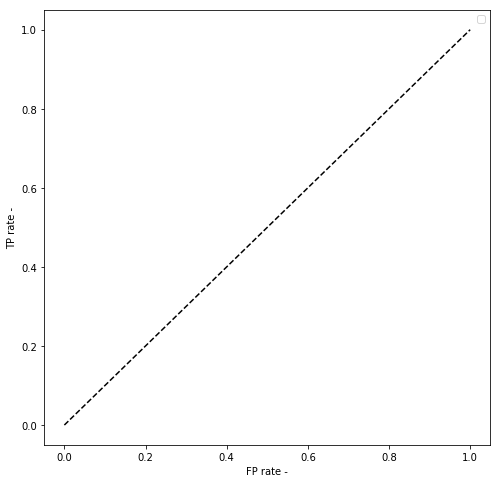

In [34]:
# 차트의 모양 잡기
plt.figure(figsize=(8,8))

# 키값 , 선형차트의 선모양, 알고리즘 <= 반복
for key,(line_style, model )in class_map.items():
#     print(key, line_style, model)
    # 1. 훈련(학습) : 20 % 
    model.fit(X_train, y_train)
    # 2. 예측 : 80 % 
    # 예측확률이 높은 쪽으로 정답을 정한다.
    predict = model.predict_proba(X_test)
    # 실제로는 각 row별로 확률이 높은값을 선택 해야 하나, 그냥 1번 컬럼으로 진행 하겠다.
    pred    = pd.Series(predict[:,1]) # 
    print('-'*10)
    # predict에서 1번 데이터만 모은다.
#     print(type(predict), predict.shape, predict[0,:], predict[0,:].sum())
    print('*'*10)
#     predict[:,1]
    break
    # 3. roc 커브 드로잉 
    # fpr : 거짓 양성비  
    # tpr : 참   양성비
    #  _  : 임계값 => tpr, fpr 계산시 사용한 임계값 
    fpr, tpr, _= roc_curve( y_test, pred )
    # 그린다 
    plt.plot(fpr, tpr, line_style, line_width = 5, label = key)
    # 4. auc 값 출력(print)
    print(key, auc(fpr, tpr))
    
    pass

# 범례
plt.legend()
# 기준 가이드 선 (1차 함수, 기울기 1 )
plt.plot([0,1],[0,1],'k--')

# x 라벨 
plt.xlabel('FP rate -')
plt.ylabel('TP rate -')

# 화면 보이기 
plt.show()

In [ ]:
# 1. 시각화를 위해서 준비, 알고리즘 생성
class_map = {
  'LogisticRegression'    :('-',  LogisticRegression()),
  'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5)),
  'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5, 
                            n_estimators=10, max_features=1)),
  'GaussianNB'            :(':',  GaussianNB())
}

In [35]:
CLASS_TYPE = 1  # 0:'setosa', 1:'versicolor', 2:'virginica'
X = df[ df.columns[:-1]] 
Y = df[df.columns[-1]] == CLASS_TYPE
# Y  => 참과 거짓으로 바뀜 -> 이진 분류로 변경 => 답은 참 x % 레이블링이 바뀜 
# 참 + 거짓 = 1 
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.8)

LogisticRegression 0.7759375000000001
DecisionTreeClassifier 0.9187500000000002
RandomForestClassifier 0.97453125
GaussianNB 0.9825


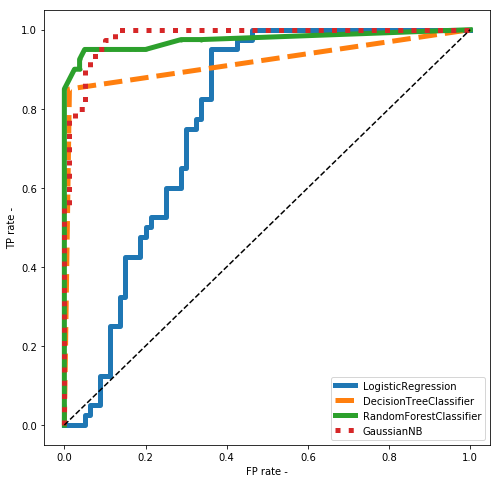

In [36]:
plt.figure(figsize=(8,8))

for key,(line_style, model )in class_map.items():

    model.fit(X_train, y_train)
    predict     = model.predict_proba( X_test )
    pred        = pd.Series( predict[:,CLASS_TYPE] ) 
    fpr, tpr, _ = roc_curve( y_test, pred )
    plt.plot(fpr, tpr, line_style, linewidth = 5, label= key)
    print(key, auc(fpr, tpr))


plt.legend()
plt.plot([0,1],[0,1],'k--')

plt.xlabel('FP rate -')
plt.ylabel('TP rate -')

plt.show()

[나이브베이즈 분류모형](https://datascienceschool.net/view-notebook/c19b48e3c7b048668f2bb0a113bd25f7/)

# 머신러닝 > 지도학습 > 분류 > 성능평가 지표
---

- 통계학의 혼동행렬이라는 항목을 이용하여 평가
- 예측값이 실제 관측값을 얼마나 정확하게 예측하였는지, 이것을 보여주는 행렬
  - 암을 예측하였는데, 실제로 양성이였는가? 음성이였는가?

## 혼동행렬(오차행렬)
---
- 실제로 병이 있다면 
    - Positive (P)
- 실제로 병이 없다면
    - Nagative (N)
    
- 실제로 병이 있다고 예측했다 : True  ->  T
- 실제로 병이 없다고 예측했다 : False ->  F

--- 
- TP 상황 (True, Positive)
    - 병이 있다고 예측하였는데, 실제로 병이 있었다 
    -  TP(긍정한것이 참이되었다.)
- TN 상황 (True, Nagative)
    - 병이 없을거라고 예측하였는데, 실제로 병이 없었다.
    - TN(부정한것이 참이되었다.)
    
- FP 상황 (False,Positive)
    - 실제로 병이 있을거라 생각했는데, 실제로 병이 없었다. 
    - FP( 긍정한 것이 부정되었다)
    - 1형 오류
- FN 상황 (False, Nagative)
    - 실제로 병이 없다고 예측했는데, 실제로 병이 있었다.
    - FN(부정한 것이 부정 되었다.)
    - 2형 오류 

- 정확도( accuracy )
    - 
- 정밀도( precision )
    - 병이 있다고 예측을 하였는데, 실제 병이 있는 비율, 정답율 
    - TP / (TP + FP)
- 재현율( recall )
    - 
- F1 점수, f1-score
    -  정밀도와 재현율의 조화 평균 
- 특이성 
    - 실제 병이 없는 전체 데이터 중에 예측이 참 부정의 비율 
    
```py
# 이쁘게 출력하기위해 프린트 사용 
print( metrics.classification_report(freq[1]['labels'], predict ))
출력물 >>>


              precision    recall  f1-score   support

          en       0.67      1.00      0.80         2
          fr       1.00      1.00      1.00         2
          id       1.00      0.50      0.67         2
          tl       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.92      0.88      0.87         8
weighted avg       0.92      0.88      0.87         8

```